## Exploratory Data Analysis - Sample Superstore

## Author : Aryan Kenchappagol | aryan.kenchappagol@gmail.com

### Problem Satement : Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’ and find out trends and meaningful conclusions from it.

### Approach : 
   ### 1. Regional Analysis
   ### 2. Product Analysis

## Importing Necessary Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


<Figure size 432x432 with 0 Axes>

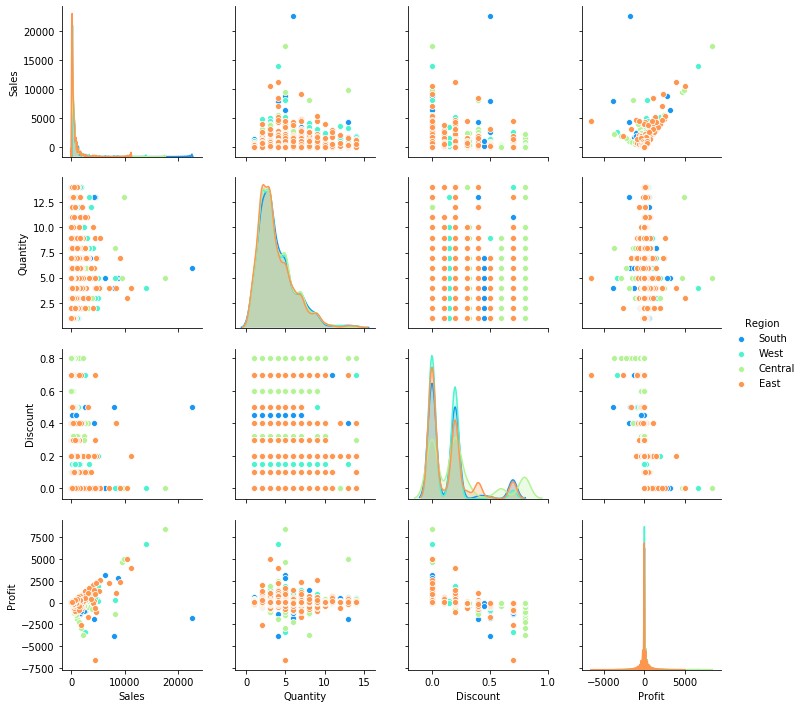

In [5]:
plt.figure(figsize=(6,6))
sns.pairplot(df.drop(columns = ['Country', 'Postal Code', 'City', 'Ship Mode'], axis = 1), palette='rainbow', hue='Region')
plt.show()

In [6]:
df.sort_values('Region', inplace=True)

In [7]:
df.reset_index(inplace=True)

In [8]:
df.columns

Index(['index', 'Ship Mode', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
df = df[['Ship Mode', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales',
       'Quantity', 'Discount', 'Profit']]
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Standard Class,Corporate,United States,Columbus,Indiana,47201,Central,Office Supplies,Envelopes,180.960,2,0.0,81.4320
1,Standard Class,Consumer,United States,Aurora,Illinois,60505,Central,Furniture,Chairs,239.358,3,0.3,-47.8716
2,Second Class,Consumer,United States,Irving,Texas,75061,Central,Office Supplies,Paper,219.840,5,0.2,79.6920
3,Standard Class,Corporate,United States,Detroit,Michigan,48234,Central,Office Supplies,Fasteners,6.080,1,0.0,3.0400
4,Second Class,Home Office,United States,Austin,Texas,78745,Central,Office Supplies,Binders,3.882,3,0.8,-5.8230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,First Class,Corporate,United States,Tempe,Arizona,85281,West,Office Supplies,Envelopes,12.768,6,0.2,4.6284
9990,First Class,Corporate,United States,Tempe,Arizona,85281,West,Technology,Phones,318.400,2,0.2,107.4600
9991,Second Class,Corporate,United States,Las Vegas,Nevada,89115,West,Office Supplies,Paper,32.400,5,0.0,15.8760
9992,Second Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Art,18.240,3,0.0,5.2896


In [10]:
df.Region.unique()

array(['Central', 'East', 'South', 'West'], dtype=object)

In [11]:
df.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

## Distribution of Data - Regionwise

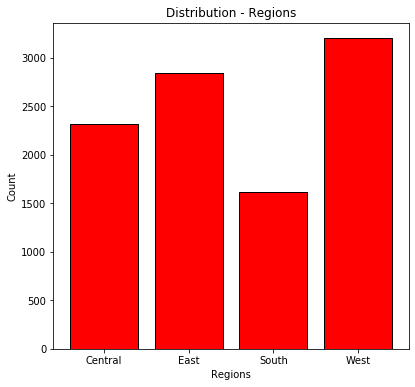

In [12]:
regions = ['Central', 'East', 'South', 'West']
count = [2323, 2848, 1620, 3203]

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)

# barplot
plt.bar(regions, count, color='red', ec='black')
plt.title("Distribution - Regions")
plt.xlabel("Regions")
plt.ylabel("Count")
plt.show()

In [13]:
df_c = df[:2323]
df_e = df[2323:5171]
df_s = df[5171:6791]
df_w = df[6791:]

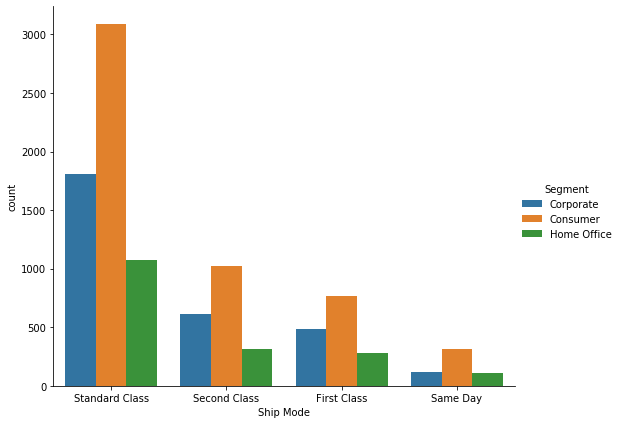

In [14]:
sns.catplot('Ship Mode',data=df,hue='Segment',kind='count',height=6, aspect=1.2)
plt.show()

## Overall Sales vs Profit Analysis

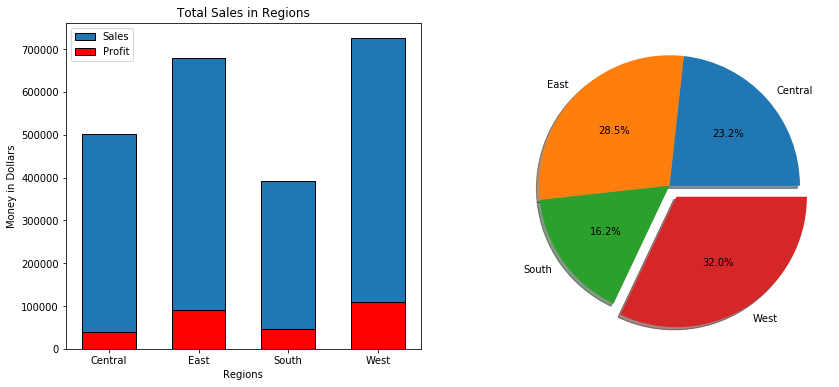

In [15]:
total_sales = [df_c['Sales'].sum(),df_e['Sales'].sum(),df_s['Sales'].sum(),df_w['Sales'].sum()]
total_profit = [df_c['Profit'].sum(),df_e['Profit'].sum(),df_s['Profit'].sum(),df_w['Profit'].sum()]

regions = ['Central', 'East', 'South', 'West']

plt.figure(figsize=(14,6))

# barplot
plt.subplot(1,2,1)
plt.bar(regions, total_sales, ec='black', label='Sales', width=0.6)
plt.bar(regions, total_profit, ec='black', color='red', label='Profit', width=0.6)
plt.title('Total Sales in Regions')
plt.xlabel('Regions')
plt.ylabel('Money in Dollars')
plt.legend()

# piechart
plt.subplot(1,2,2)
# plt.subplot(1,2,2)
exp = [0,0,0,0.1]
plt.pie(count, labels=regions, explode=exp, shadow=True, autopct='%1.1f%%')
plt.show()

### The West region has the highest sales out of the 4 regions and the south has the least sales. Also the west region is making the highest profit and the central region is making the least profit.

## Central Region Analysis

In [16]:
df_c.State.value_counts()

Texas           985
Illinois        492
Michigan        255
Indiana         149
Wisconsin       110
Minnesota        89
Oklahoma         66
Missouri         66
Nebraska         38
Iowa             30
Kansas           24
South Dakota     12
North Dakota      7
Name: State, dtype: int64

In [17]:
df_c.sort_values('State', inplace=True)
df_c.reset_index(inplace=True)
df_c.drop('index', 1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
states_c = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
       'Missouri', 'Nebraska', 'North Dakota', 'Oklahoma', 'South Dakota',
       'Texas', 'Wisconsin']

In [19]:
df_c.State.unique()

array(['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
       'Missouri', 'Nebraska', 'North Dakota', 'Oklahoma', 'South Dakota',
       'Texas', 'Wisconsin'], dtype=object)

In [20]:
df_c.set_index('State', inplace=True)

In [21]:
states_profit_c = []

states_c = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
       'Missouri', 'Nebraska', 'North Dakota', 'Oklahoma', 'South Dakota',
       'Texas', 'Wisconsin']
states_c.sort()

for i in states_c:
    states_profit_c.append(df_c.loc[i].Profit.sum())
# print(states_profit_c)    

In [22]:
states_sales_c = []
for i in states_c:
    states_sales_c.append(df_c.loc[i].Sales.sum())
# print(states_sales_c)

In [23]:
# df_c.loc['Illinois'].Profit.sum()

In [24]:
table_c = pd.DataFrame({
        'c_states' :  ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
       'Missouri', 'Nebraska', 'North Dakota', 'Oklahoma', 'South Dakota',
       'Texas', 'Wisconsin'],
        'c_profit' : [-12607.887, 18382.936299999998, 1183.8119, 836.4435000000001, 24463.187599999997, 10823.187400000003, 6436.210500000001, 2037.0942000000005, 230.1497, 4853.956, 394.8283, -25729.3563, 8401.800400000002],
        'c_sales':[80166.101, 53555.36, 4579.759999999999, 2914.31, 76269.614, 29863.149999999998, 22205.149999999998, 7464.93, 919.91, 19683.390000000003, 1315.56, 170188.04580000002, 32114.61]
})
table_c

,c_states,c_profit,c_sales
0,Illinois,-12607.8870,80166.1010
1,Indiana,18382.9363,53555.3600
2,Iowa,1183.8119,4579.7600
3,Kansas,836.4435,2914.3100
4,Michigan,24463.1876,76269.6140
5,Minnesota,10823.1874,29863.1500
6,Missouri,6436.2105,22205.1500
7,Nebraska,2037.0942,7464.9300
8,North Dakota,230.1497,919.9100
9,Oklahoma,4853.9560,19683.3900


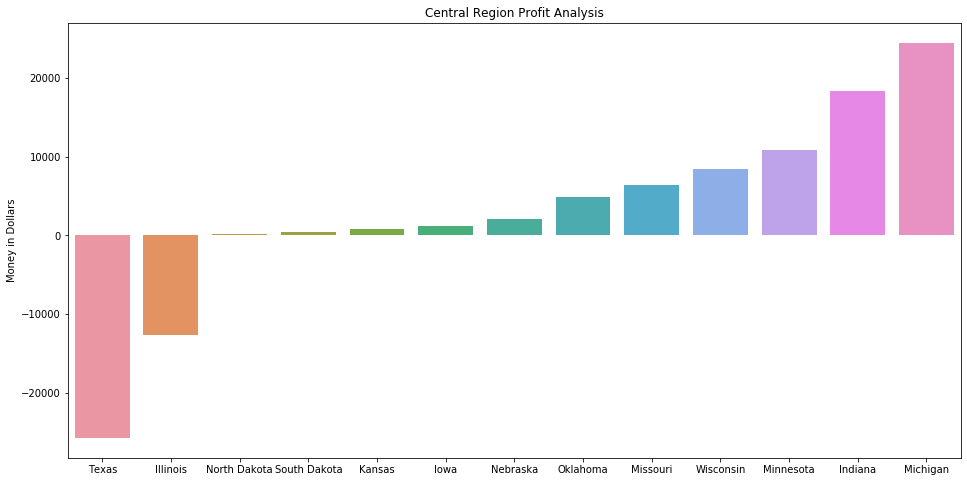

In [25]:
plt.figure(figsize=(16,8))
sns.barplot(x=states_c, y=states_profit_c, data=table_c, order=table_c.sort_values('c_profit').c_states)
plt.title('Central Region Profit Analysis')
plt.ylabel('Money in Dollars')
plt.show()

### Amongst all the states from the central region, Michigan makes the highest profit followed by Indiana, Minnesota and others. Whereas Texas drops down in money making as it has incurred a  huge loss as seen from the data.

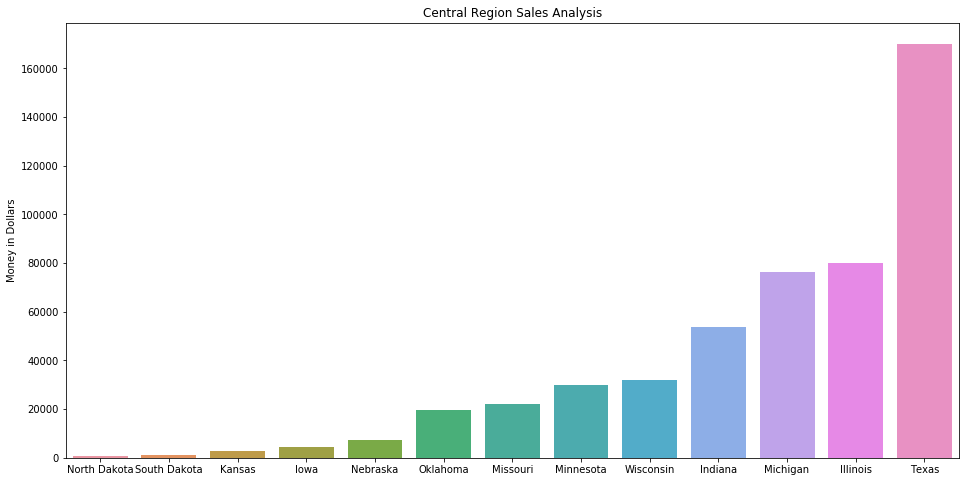

In [26]:
plt.figure(figsize=(16,8))
sns.barplot(x=states_c, y=states_sales_c, data=table_c, order=table_c.sort_values('c_sales').c_states)
plt.title('Central Region Sales Analysis')
plt.ylabel('Money in Dollars')
plt.show()

### From the profit analysis graph, Texas was seen to have the least profit. But the sales in Texas tops the chart. It is then followed by Illinois and Michigan nad others in the order.

## East Region Analysis

In [27]:
df_e.sort_values('State', inplace=True)
df_e.reset_index(inplace=True)
df_e.drop('index', 1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_e.State.unique()

array(['Connecticut', 'Delaware', 'District of Columbia', 'Maine',
       'Maryland', 'Massachusetts', 'New Hampshire', 'New Jersey',
       'New York', 'Ohio', 'Pennsylvania', 'Rhode Island', 'Vermont',
       'West Virginia'], dtype=object)

In [29]:
states_e = ['Connecticut', 'Delaware', 'District of Columbia', 'Maine',
       'Maryland', 'Massachusetts', 'New Hampshire', 'New Jersey',
       'New York', 'Ohio', 'Pennsylvania', 'Rhode Island', 'Vermont',
       'West Virginia']

In [30]:
df_e.set_index('State', inplace=True)

In [31]:
states_profit_e = []

states_e = ['Connecticut', 'Delaware', 'District of Columbia', 'Maine',
       'Maryland', 'Massachusetts', 'New Hampshire', 'New Jersey',
       'New York', 'Ohio', 'Pennsylvania', 'Rhode Island', 'Vermont',
       'West Virginia']
states_e.sort()

for i in states_e:
    states_profit_e.append(df_e.loc[i].Profit.sum())

In [32]:
states_sales_e = []
for i in states_e:
    states_sales_e.append(df_e.loc[i].Sales.sum())

In [33]:
table_e = pd.DataFrame({
        'e_states' :  ['Connecticut', 'Delaware', 'District of Columbia', 'Maine',
       'Maryland', 'Massachusetts', 'New Hampshire', 'New Jersey',
       'New York', 'Ohio', 'Pennsylvania', 'Rhode Island', 'Vermont',
       'West Virginia'],
        'e_profit' :[3511.4918000000002, 9977.374800000001, 1059.5892999999999, 454.48620000000005, 7031.178800000001, 6785.5016000000005, 1706.5027999999998, 9772.9138, 74038.5486, -16971.3766, -15559.9603, 7285.6293, 2244.9782999999998, 185.9216],
        'e_sales': states_sales_e
})

## East Region Profit Analysis

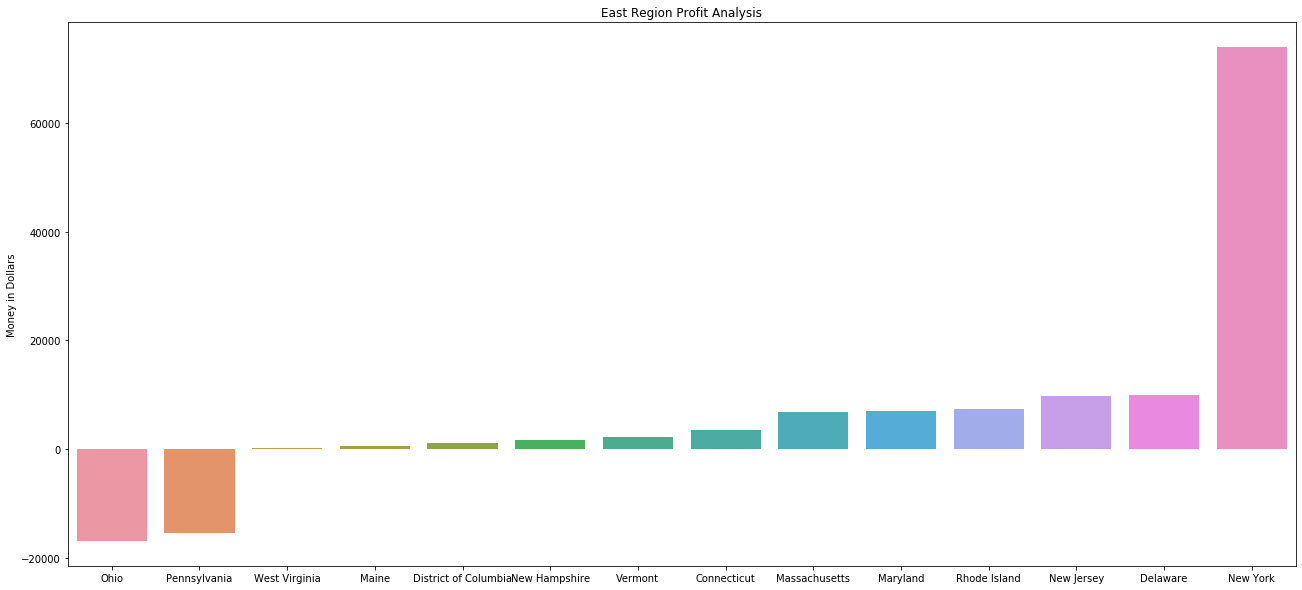

In [34]:
plt.figure(figsize=(22,10))
sns.barplot(x=states_e, y=states_profit_e, data=table_e, order=table_e.sort_values('e_profit').e_states)
plt.title('East Region Profit Analysis')
plt.ylabel('Money in Dollars')
plt.show()

### New York performs massively well in the profit area as compared to the other states in the east region follwed by Delaware, New Jersey and so on whereas Ohio and Pensylvania are performing very poorly 

## East Region Sales Analysis

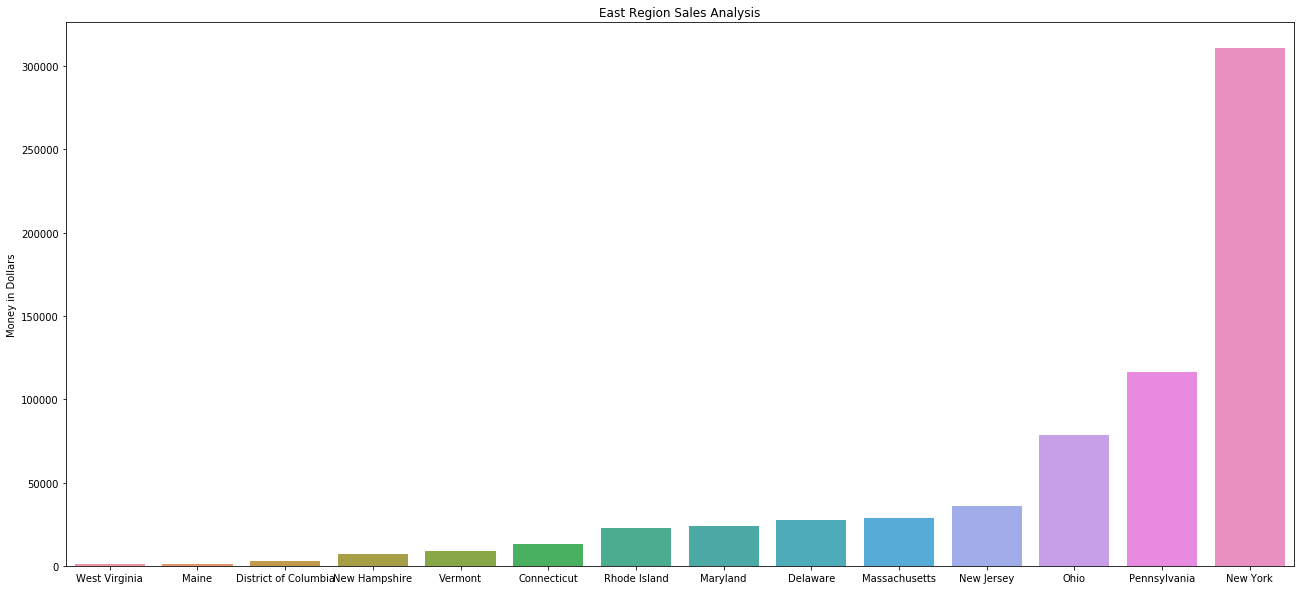

In [35]:
plt.figure(figsize=(22,10))
sns.barplot(x=states_e, y=states_sales_e, data=table_e, order=table_e.sort_values('e_sales').e_states)
plt.title('East Region Sales Analysis')
plt.ylabel('Money in Dollars')
plt.show()

### Again New York tops the chart in the Sales Analysis followed by Pennsylvania and Ohio. The 2nd and 3rd on the chart have the least Profit making business in the eastern region yet they are good at sales over ehre.

## South Region 

In [36]:
df_s.sort_values('State', inplace=True)
df_s.reset_index(inplace=True)
df_s.drop('index', 1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_s.State.unique()

array(['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky',
       'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina',
       'Tennessee', 'Virginia'], dtype=object)

In [38]:
states_s = ['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky',
       'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina',
       'Tennessee', 'Virginia']

In [39]:
df_s.set_index('State', inplace=True)
states_profit_s = []

states_s = ['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky',
       'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina',
       'Tennessee', 'Virginia']

states_e.sort()

for i in states_s:
    states_profit_s.append(df_s.loc[i].Profit.sum())
print(states_profit_s)    

states_sales_s = []
for i in states_s:
    states_sales_s.append(df_s.loc[i].Sales.sum())
print(states_sales_s)

table_s = pd.DataFrame({
        's_states' :  states_s,
        's_profit' : states_profit_s,
        's_sales': states_sales_s
})

[5786.8252999999995, 4008.6871, -3399.3017, 16250.043299999998, 11199.6966, 2196.1023, 3172.9761999999996, -7490.9122, 1769.0566000000001, -5341.6936, 18597.9504]
[19510.640000000003, 11678.130000000001, 89473.70800000001, 49095.84, 36591.75, 9217.03, 10771.339999999998, 55603.164000000004, 8481.71, 30661.873000000007, 70636.72]


## South Region Profit Analysis

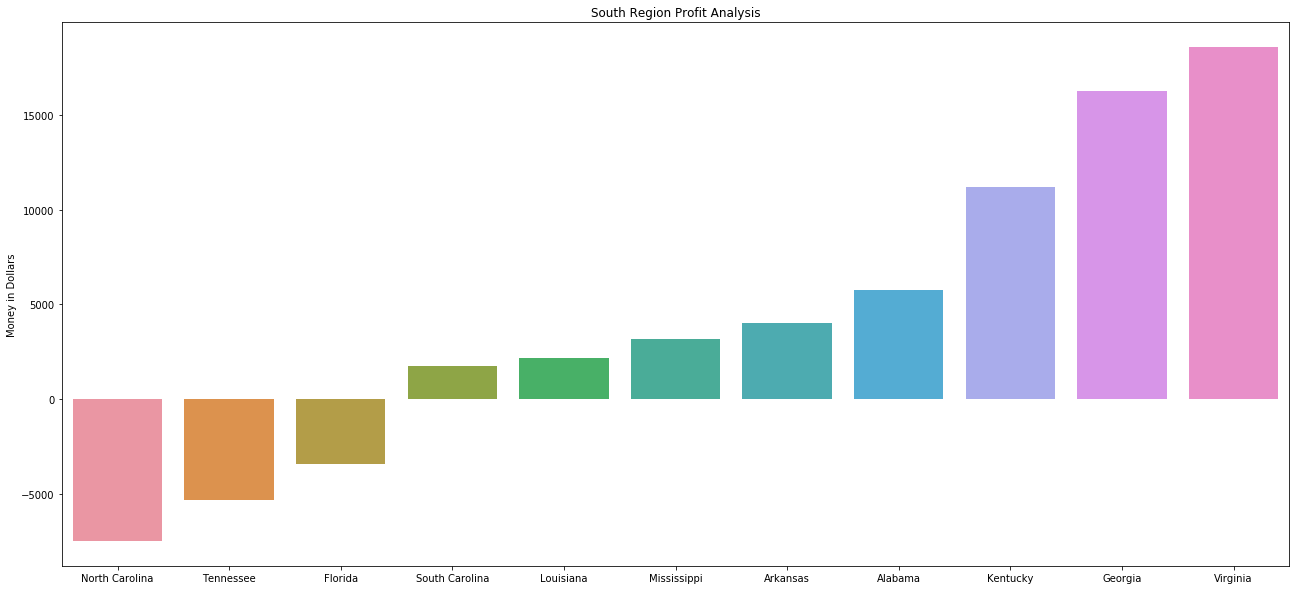

In [40]:
plt.figure(figsize=(22,10))
sns.barplot(x=states_s, y=states_profit_s, data=table_s, order=table_s.sort_values('s_profit').s_states)
plt.title('South Region Profit Analysis')
plt.ylabel('Money in Dollars')
plt.show()

### In southern region, we see Virginia and Georgia have the highest profit making business where as North Caroline and Tennessee are performing poorly

## South Region Sales Analysis

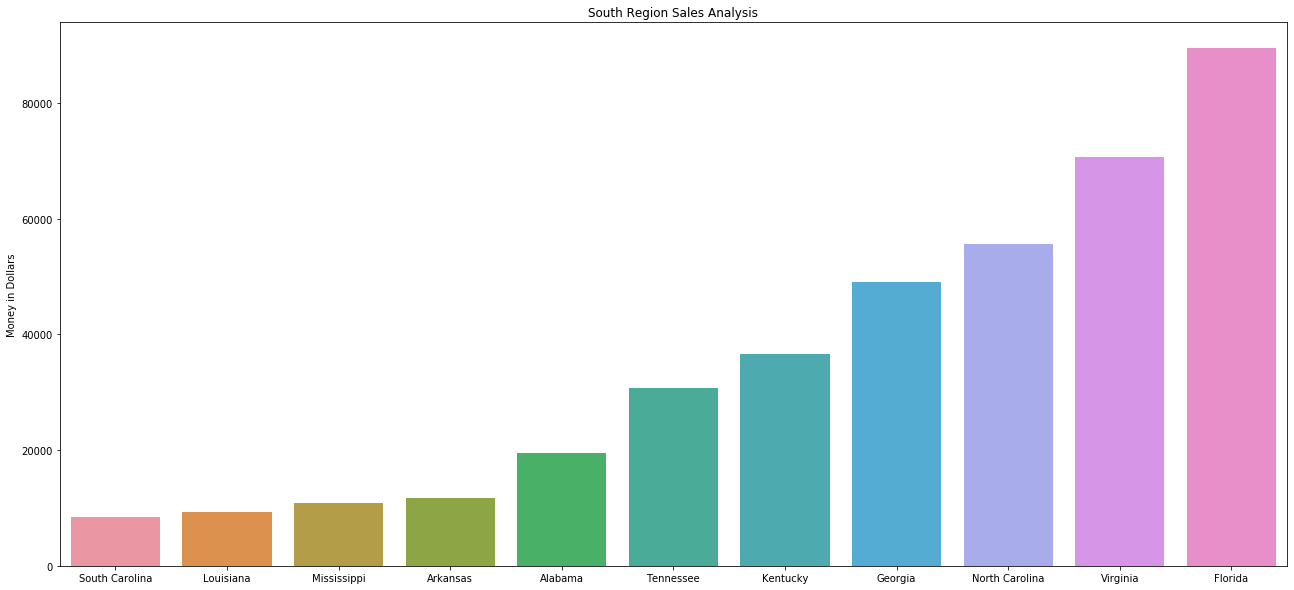

In [41]:
plt.figure(figsize=(22,10))
sns.barplot(x=states_s, y=states_sales_s, data=table_s, order=table_s.sort_values('s_sales').s_states)
plt.title('South Region Sales Analysis')
plt.ylabel('Money in Dollars')
plt.show()

### Florida performs poor in the profit making scene but here in the sales analysis, Florida does a massive sales in south region. Whereas South carolina on theother hand is the last in the sales making scenario

## West Region Analysis

In [42]:
df_w.sort_values('State', inplace=True)
df_w.reset_index(inplace=True)
df_w.drop('index', 1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_w.State.unique()

array(['Arizona', 'California', 'Colorado', 'Idaho', 'Montana', 'Nevada',
       'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming'],
      dtype=object)

In [44]:
states_w = ['Arizona', 'California', 'Colorado', 'Idaho', 'Montana', 'Nevada',
       'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']
df_w.set_index('State', inplace=True)
states_profit_w = []

states_w.sort()

for i in states_w:
    states_profit_w.append(df_w.loc[i].Profit.sum())
print(states_profit_w)    

states_sales_w = []
for i in states_w:
    states_sales_w.append(df_w.loc[i].Sales.sum())
print(states_sales_w)

table_w = pd.DataFrame({
        'w_states' :  states_w,
        'w_profit' : states_profit_w,
        'w_sales': states_sales_w
})
table_w

[-3427.9246000000003, 76381.38709999999, -6527.857899999999, 826.7230999999999, 1833.3285000000003, 3316.7659, 1157.1161000000002, -1190.4705, 2546.5334999999995, 33402.6517, 100.196]
[35282.00099999999, 457687.6315000001, 32108.118000000002, 4382.486, 5589.351999999998, 16729.102, 4783.522, 17431.149999999994, 11220.055999999999, 138641.27000000002, 1603.136]


,w_states,w_profit,w_sales
0,Arizona,-3427.9246,35282.0010
1,California,76381.3871,457687.6315
2,Colorado,-6527.8579,32108.1180
3,Idaho,826.7231,4382.4860
4,Montana,1833.3285,5589.3520
5,Nevada,3316.7659,16729.1020
6,New Mexico,1157.1161,4783.5220
7,Oregon,-1190.4705,17431.1500
8,Utah,2546.5335,11220.0560
9,Washington,33402.6517,138641.2700


## West Region Profit Analysis

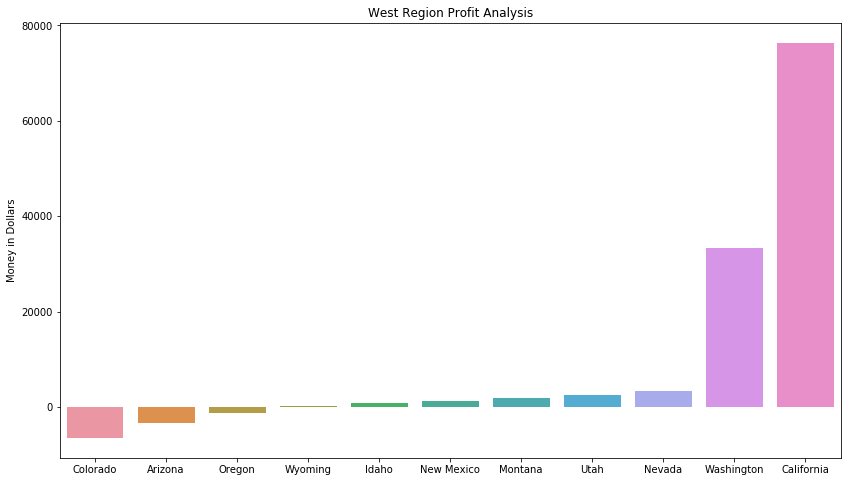

In [45]:
plt.figure(figsize=(14,8))
sns.barplot(x=states_w, y=states_profit_w, data=table_w, order=table_w.sort_values('w_profit').w_states)
plt.title('West Region Profit Analysis')
plt.ylabel('Money in Dollars')
plt.show()

### California tops the chart massively in the west region followed by Washington and Colorado as we can see come last in the profit making business

## West Region Sales Analysis

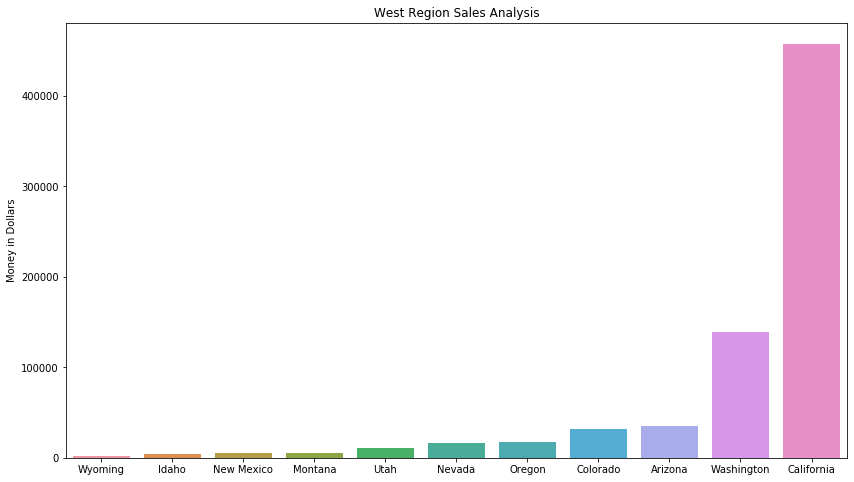

In [46]:
plt.figure(figsize=(14,8))
sns.barplot(x=states_w, y=states_sales_w, data=table_w, order=table_w.sort_values('w_sales').w_states)
plt.title('West Region Sales Analysis')
plt.ylabel('Money in Dollars')
plt.show()

### Again here in the Sales Dmain, California tops the chart followed by Washington and Wyoming is performing poor in the sales business. It is seen that Washington and California are strong areas for the business

## Segment Type Analysis

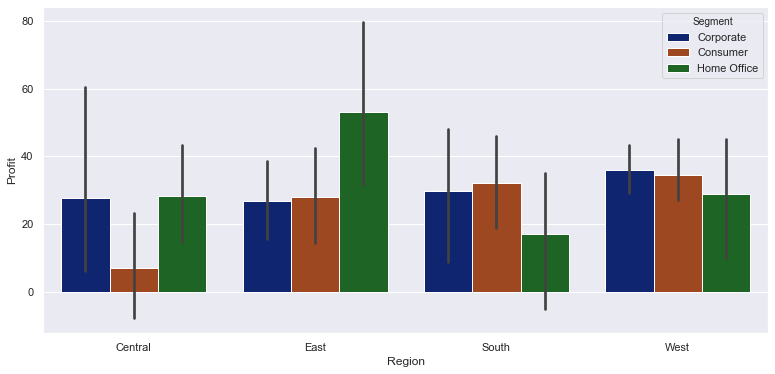

In [47]:
plt.figure(figsize = (13,6))
sns.set(font_scale=1, palette= "dark")
sns.barplot(data = df , x = "Region",y = "Profit" ,hue = "Segment")
plt.show()

In [49]:
df_w.sort_values('Category', inplace=True)

# df_w.set_index('Category', 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
df.sort_values('Category', inplace=True)

In [54]:
df.reset_index(inplace=True)
df.drop('index', 1, inplace=True)

In [55]:
df.set_index('Category', inplace=True)

### 2. Category Analysis

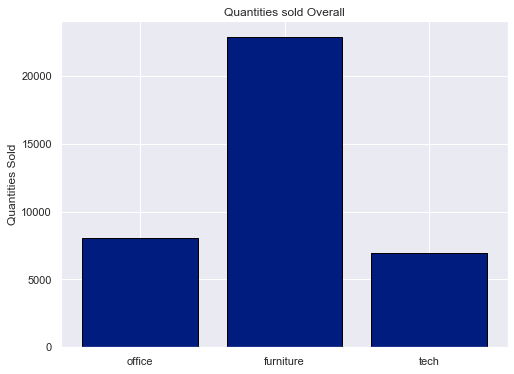

In [56]:
quantities = [df.loc['Furniture'].Quantity.sum(), df.loc['Office Supplies'].Quantity.sum(), df.loc['Technology'].Quantity.sum()]
plt.figure(figsize=(8,6))
plt.bar(category_names, quantities, ec='black')
plt.ylabel('Quantities Sold')
plt.title('Quantities sold Overall')
plt.show()

### Furniture products are sold at a great amount overall in the United States. Office Products and Tech products almost have the same amount of quantities sold. To be precise, office supplies relatively better.

## Analysing Profit for each area

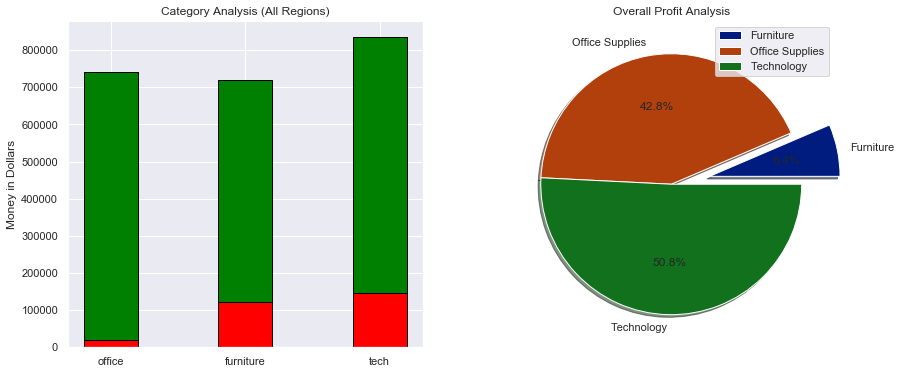

In [57]:
category_profit = [df.loc['Furniture'].Profit.sum(), df.loc['Office Supplies'].Profit.sum(), df.loc['Technology'].Profit.sum()]
category_sales = [df.loc['Furniture'].Sales.sum(), df.loc['Office Supplies'].Sales.sum(), df.loc['Technology'].Sales.sum()]

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.bar(category_names, category_sales, width=0.4, color='green', ec='black')
plt.bar(category_names, category_profit, width=0.4, color='red', ec='black')
plt.ylabel('Money in Dollars')
plt.title('Category Analysis (All Regions)')

plt.subplot(1,2,2)
explode_category=[0.3,0,0]
plt.pie(category_profit, labels=['Furniture', 'Office Supplies', 'Technology'], shadow=True, explode=explode_category,autopct='%1.1f%%')
plt.title('Overall Profit Analysis')
plt.legend()
plt.show()

### Technology makes the highest profit followed by furniture. Whereas Office Supplies has the least profit making business 

In [84]:
df_furniture = df.loc['Furniture']
df_off = df.loc['Office Supplies']
df_tech = df.loc['Technology']

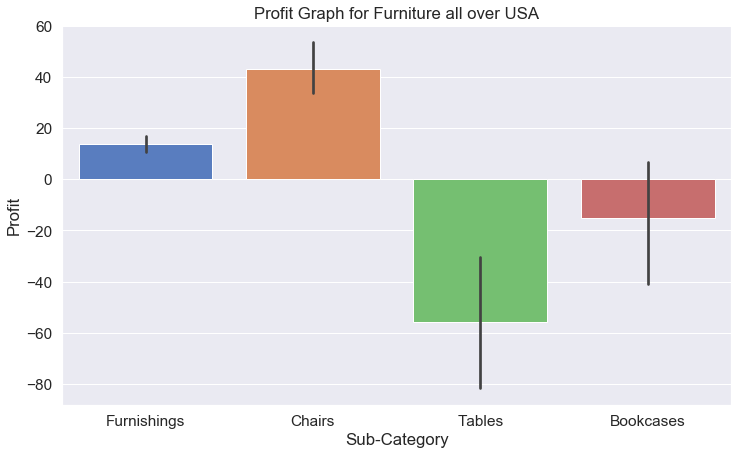

In [76]:
plt.figure(figsize=(12,7))
sns.set(font_scale=1.4)
sns.barplot(x='Sub-Category', y='Profit', data=df_furniture, palette= "muted")
plt.title('Profit Graph for Furniture all over USA')
plt.show()

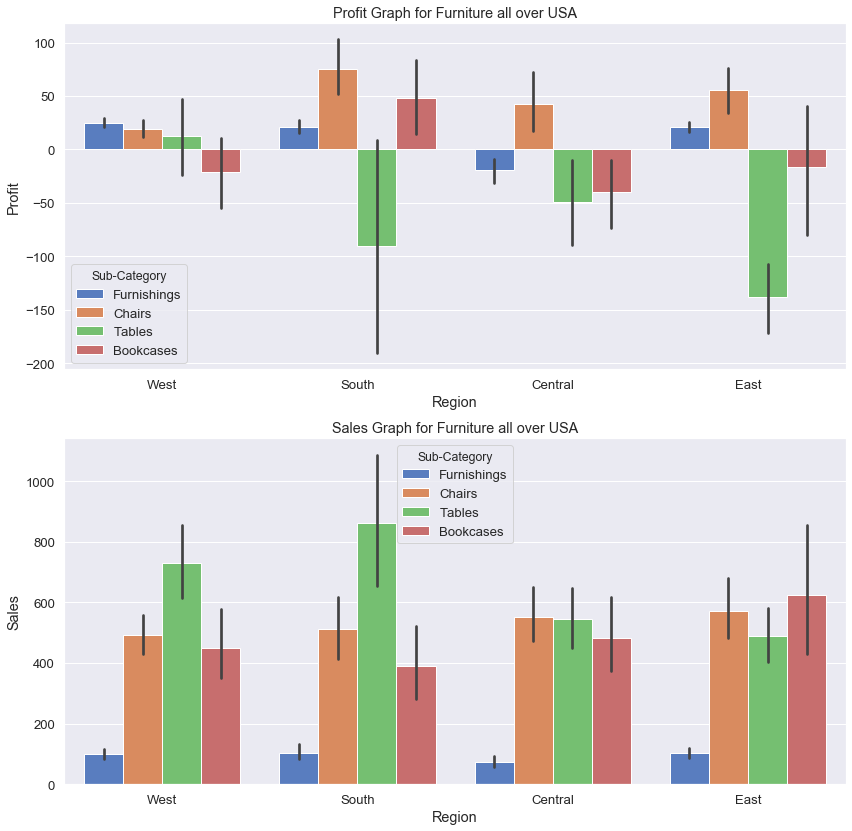

In [73]:
plt.figure(figsize=(14,14))

plt.subplot(2,1,1)
sns.set(font_scale=1.2)
sns.barplot(x='Region', y='Profit', data=df_furniture, palette= "muted", hue='Sub-Category')
plt.title('Profit Graph for Furniture all over USA')

plt.subplot(2,1,2)
sns.set(font_scale=1.2)
sns.barplot(x='Region', y='Sales', data=df_furniture, palette= "muted", hue='Sub-Category')
plt.title('Sales Graph for Furniture all over USA')
plt.show()

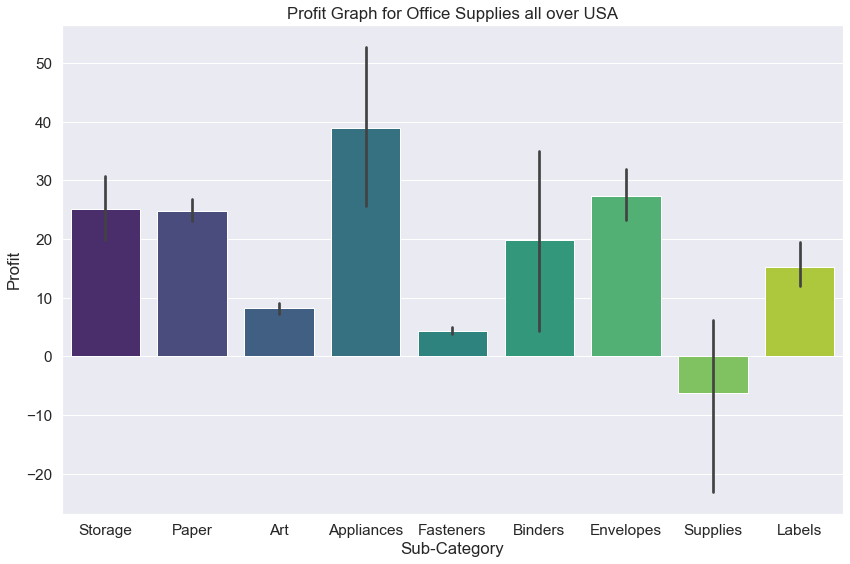

In [63]:
plt.figure(figsize=(14,9))
sns.set(font_scale=1.4)
sns.barplot(x='Sub-Category', y='Profit', data=df_off, palette= "viridis")
plt.title('Profit Graph for Office Supplies all over USA')
plt.show()

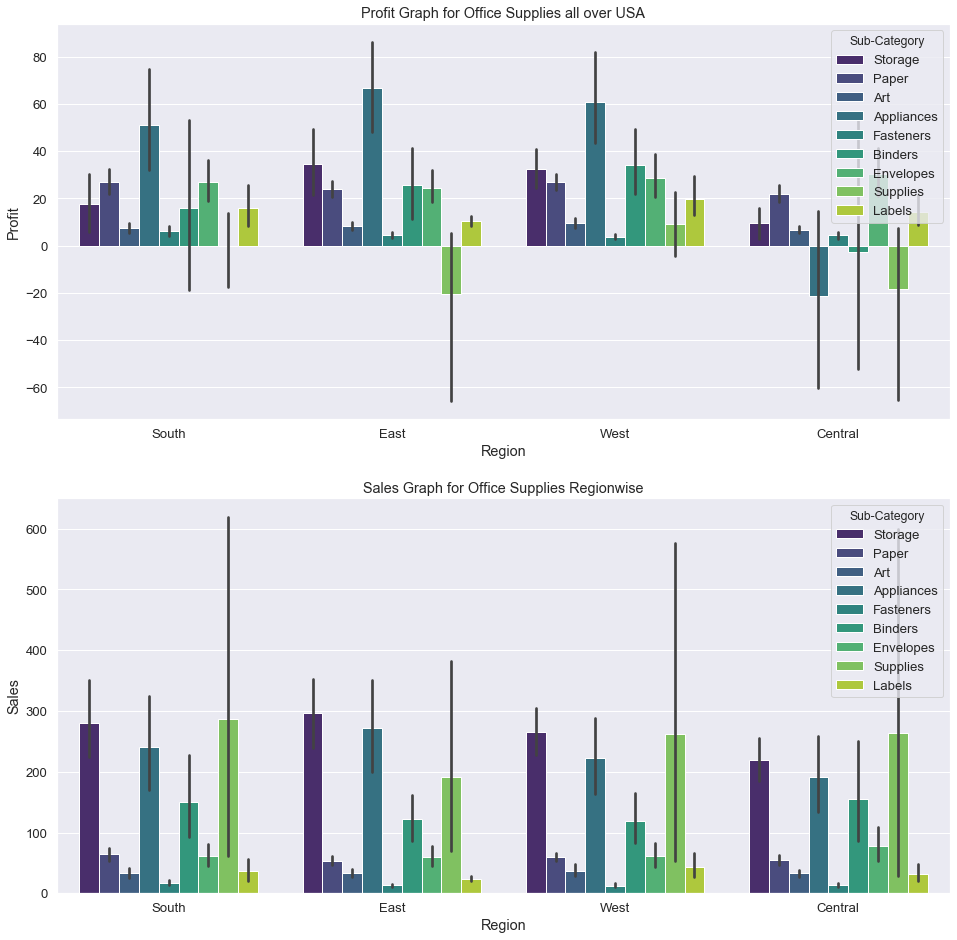

In [75]:
plt.figure(figsize=(16,16))
plt.subplot(2,1,1)
sns.set(font_scale=1.2)
sns.barplot(x='Region', y='Profit', data=df_off, palette= "viridis", hue='Sub-Category')
plt.title('Profit Graph for Office Supplies all over USA')

plt.subplot(2,1,2)
sns.set(font_scale=1.2)
sns.barplot(x='Region', y='Sales', data=df_off, palette= "viridis", hue='Sub-Category')
plt.title('Sales Graph for Office Supplies Regionwise')
plt.show()

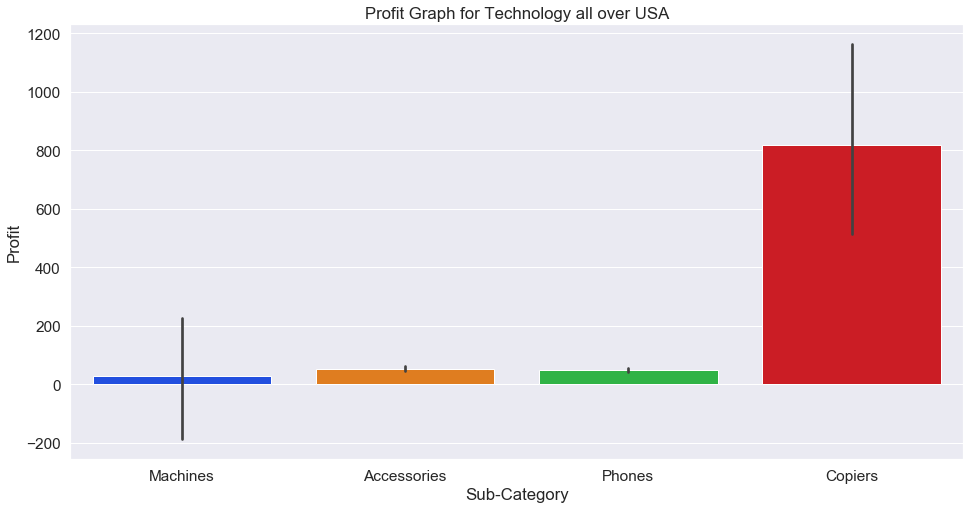

In [77]:
plt.figure(figsize=(16,8))
sns.set(font_scale=1.4)
sns.barplot(x='Sub-Category', y='Profit', data=df_tech, palette= "bright")
plt.title('Profit Graph for Technology all over USA')
plt.show()

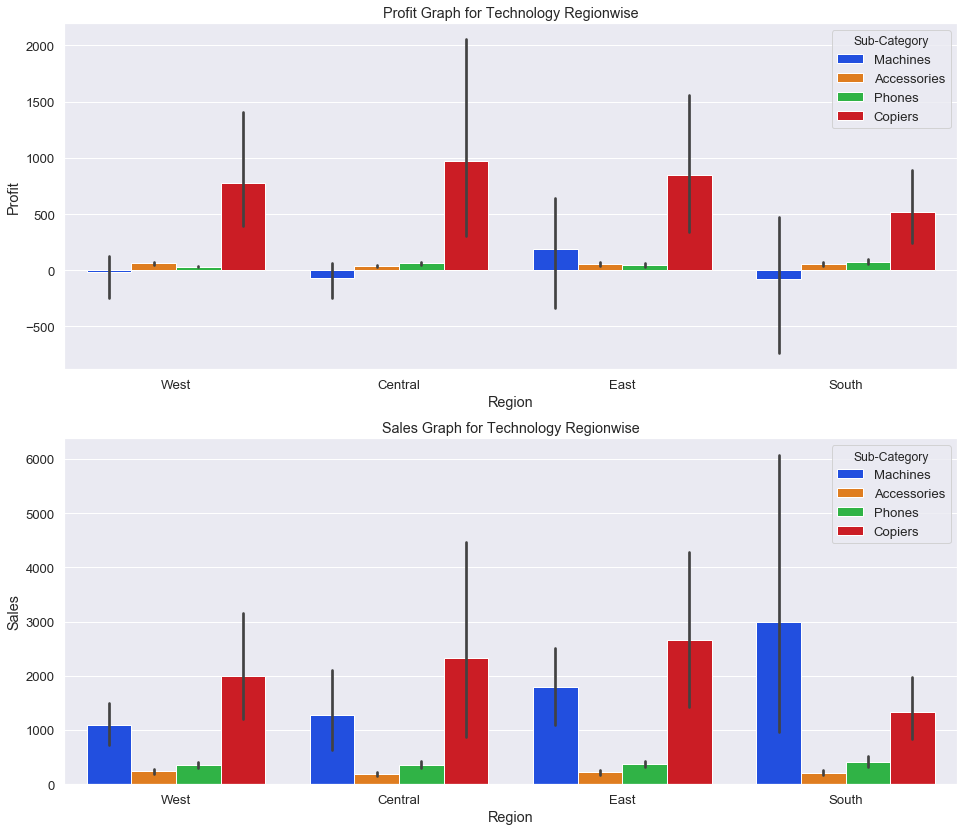

In [67]:
plt.figure(figsize=(16,14))

plt.subplot(2,1,1)
sns.set(font_scale=1.2)
sns.barplot(x='Region', y='Profit', data=df_tech, palette= "bright", hue='Sub-Category')
plt.title('Profit Graph for Technology Regionwise')

plt.subplot(2,1,2)
sns.set(font_scale=1.2)
sns.barplot(x='Region', y='Sales', data=df_tech, palette= "bright", hue='Sub-Category')
plt.title('Sales Graph for Technology Regionwise')
plt.show()

# Conclusion
### Regional Analysis
1. In the Central Region, stores located in Illinois and Texas are performing very poorly and must be looked out. Out of all the regions, the Central region has the least profit, so measure should be taken in order to improve the business and services in this region.
2. In the Eastern Region, Ohio and Pennsylvania have th elowest profit making stores. Insigths must be taken from New York store in order to rise the Profit making venture in these two places.
3. In the Southern Region, North Carolina, Tennessee and Florida are poorly performing states. So measures must be taken in order to rise the profit making scenario in these areas.
4. In the Western Region, California and Washington are performing extremely well and the states which are very low in the profit analysis i.e Colorado and Arizona should take quick measures to find out what's wrong and quickly make the necessary changes to it. 

### Product Analysis
1. Furniture products are sold at a great amount overall in the United States. Office Products and Tech products almost have the same amount of quantities sold. To be precise, office supplies relatively better.
2. In Furniture Profit Analysis, we se that Chairs is making the highest profit whereas Tables fall down in the graph. Region wise Analysis for every element is shown in the graph.
3. In office Supplies, Appliances makes the highest profit followed by storage and paper. Lowest profit making products are supplie sunder this category. Measures should be taken to improve the money making market in this region.
4. Copiers under technology sector are performing massively well whereas the other three product have been performing in almost same range under profit domain.